In [3]:
# 🏠 TASK 6 — HOUSE PRICE PREDICTION

"""
Objective:
----------
We aim to predict house prices using property features such as size, number of bedrooms, and location.

Dataset:
--------
House Price Prediction Dataset from Kaggle:
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Skills Demonstrated:
--------------------
✔ Regression modeling
✔ Feature scaling and selection
✔ Model evaluation (MAE, RMSE, R²)
✔ Real estate data understanding
✔ Data preprocessing (handling missing values, encoding categorical features)

Steps:
------
1. Import Libraries
2. Load Dataset
3. Data Exploration & Understanding
4. Exploratory Data Analysis (EDA)
5. Feature Selection
6. Preprocessing Pipelines
7. Train-Test Split
8. Model Building (Linear Regression & Gradient Boosting)
9. Model Training
10. Predictions
11. Model Evaluation (MAE, RMSE, R²)
12. Visualization (Actual vs Predicted)
13. Model Comparison
"""

'\nObjective:\n----------\nWe aim to predict house prices using property features such as size, number of bedrooms, and location.\n\nDataset:\n--------\nHouse Price Prediction Dataset from Kaggle:\nhttps://www.kaggle.com/datasets/yasserh/housing-prices-dataset\n\nSkills Demonstrated:\n--------------------\n✔ Regression modeling\n✔ Feature scaling and selection\n✔ Model evaluation (MAE, RMSE, R²)\n✔ Real estate data understanding\n✔ Data preprocessing (handling missing values, encoding categorical features)\n\nSteps:\n------\n1. Import Libraries\n2. Load Dataset\n3. Data Exploration & Understanding\n4. Exploratory Data Analysis (EDA)\n5. Feature Selection\n6. Preprocessing Pipelines\n7. Train-Test Split\n8. Model Building (Linear Regression & Gradient Boosting)\n9. Model Training\n10. Predictions\n11. Model Evaluation (MAE, RMSE, R²)\n12. Visualization (Actual vs Predicted)\n13. Model Comparison\n'

In [4]:

# ====================================================
# 📌 1. Import Libraries
# ====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# ====================================================
# 📌 2. Load Dataset
# ====================================================
DATA_PATH = r"C:/Users/Hp/Downloads/Housing.csv"  # Change if dataset is in another location
df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully!")
print("\n🔹 First 5 rows of the dataset:")
print(df.head())
print("\nDataset Shape (rows, columns):", df.shape)

✅ Dataset loaded successfully!

🔹 First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Shape (rows, columns): (545

In [6]:

# ====================================================
# 📌 3. Data Exploration & Understanding
# ====================================================
print("\n🔹 Dataset Information:")
print(df.info())

print("\n🔹 Missing values per column:")
print(df.isnull().sum())

print("\n🔹 Statistical Summary:")
print(df.describe())



🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

🔹 Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories

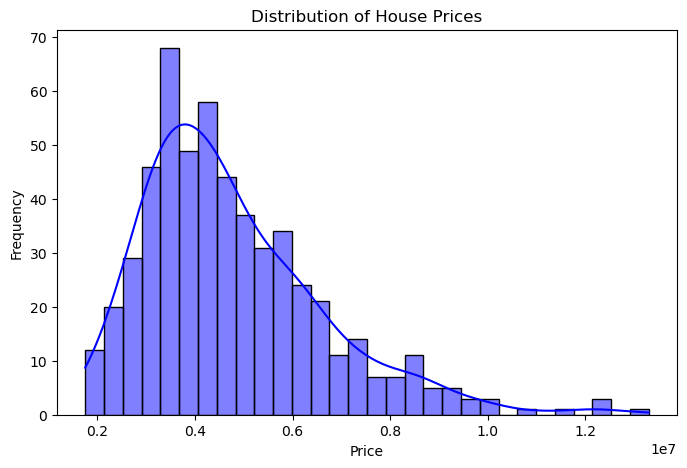

In [7]:

# ====================================================
# 📌 4. Exploratory Data Analysis (EDA)
# ====================================================
# Distribution of target variable (price)
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

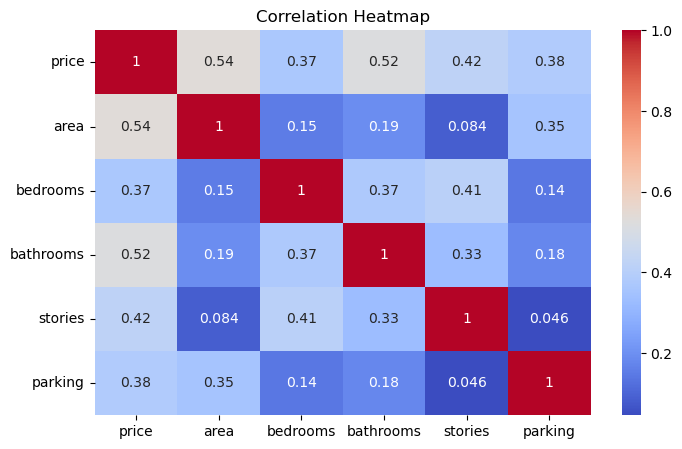

In [8]:

# Correlation heatmap for numeric variables
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:

# ====================================================
# 📌 5. Feature Selection
# ====================================================
# Drop 'id' column if exists (not useful for prediction)
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Define target and features
target = 'price'
X = df.drop(columns=[target])
y = df[target]

# Identify numeric & categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n🔹 Numeric columns:", num_cols)
print("🔹 Categorical columns:", cat_cols)


🔹 Numeric columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
🔹 Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [10]:

# ====================================================
# 📌 6. Preprocessing Pipelines
# ====================================================
# For numeric features: handle missing values & scale data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),    # Replace NaN with median
    ('scaler', StandardScaler())                      # Standardize numeric features
])

# For categorical features: handle missing values & one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # Replace NaN with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine numeric & categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [11]:

# ====================================================
# 📌 7. Train-Test Split
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\n✅ Data split into training and testing sets.")



✅ Data split into training and testing sets.


In [12]:

# ====================================================
# 📌 8. Model Building
# ====================================================
# Linear Regression model pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Gradient Boosting model pipeline
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])



In [13]:

# ====================================================
# 📌 9. Model Training
# ====================================================
print("\n⏳ Training Linear Regression...")
lr_pipeline.fit(X_train, y_train)
print("✅ Linear Regression training complete!")

print("\n⏳ Training Gradient Boosting...")
gbr_pipeline.fit(X_train, y_train)
print("✅ Gradient Boosting training complete!")



⏳ Training Linear Regression...
✅ Linear Regression training complete!

⏳ Training Gradient Boosting...
✅ Gradient Boosting training complete!


In [14]:

# ====================================================
# 📌 10. Predictions
# ====================================================
lr_pred = lr_pipeline.predict(X_test)
gbr_pred = gbr_pipeline.predict(X_test)


In [16]:

# ====================================================
# 📌 11. Model Evaluation Function
# ====================================================
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.3f}")
    return mae, rmse, r2

lr_results = evaluate_model("Linear Regression", y_test, lr_pred)
gbr_results = evaluate_model("Gradient Boosting", y_test, gbr_pred)


📊 Linear Regression Performance:
MAE  : 970043.40
RMSE : 1324506.96
R²   : 0.653

📊 Gradient Boosting Performance:
MAE  : 969687.93
RMSE : 1302052.72
R²   : 0.665


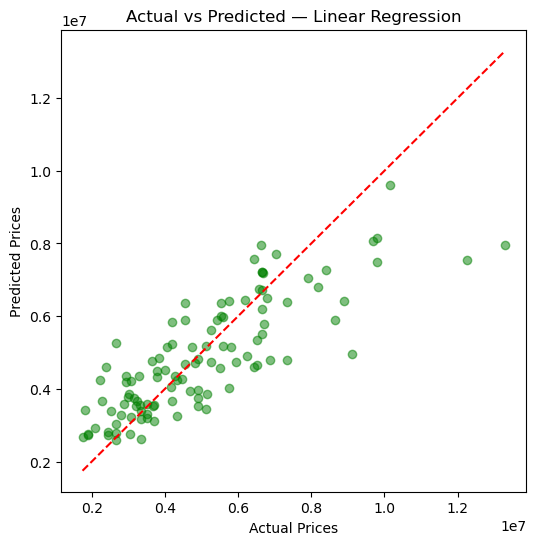

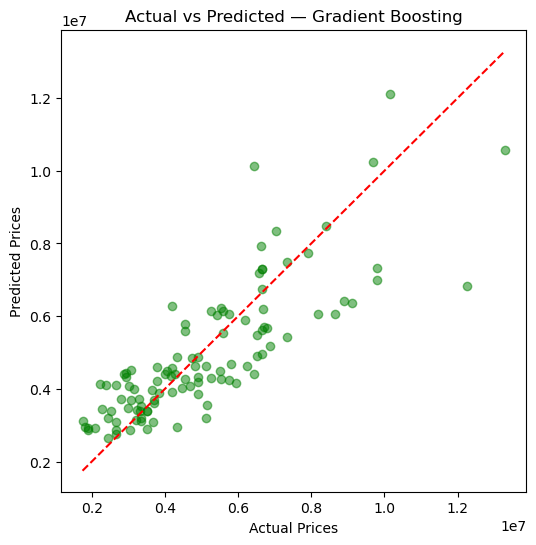

In [17]:

# ====================================================
# 📌 12. Visualization — Actual vs Predicted
# ====================================================
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5, color='green')
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(title)
    plt.show()

plot_actual_vs_predicted(y_test, lr_pred, "Actual vs Predicted — Linear Regression")
plot_actual_vs_predicted(y_test, gbr_pred, "Actual vs Predicted — Gradient Boosting")


📌 Model Comparison Table:
               Model           MAE          RMSE        R²
0  Linear Regression  970043.40392  1.324507e+06  0.652924
1  Gradient Boosting  969687.92658  1.302053e+06  0.664592


C:\Users\Hp\AppData\Local\Temp\ipykernel_8796\791842443.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=comparison_df, palette='coolwarm')


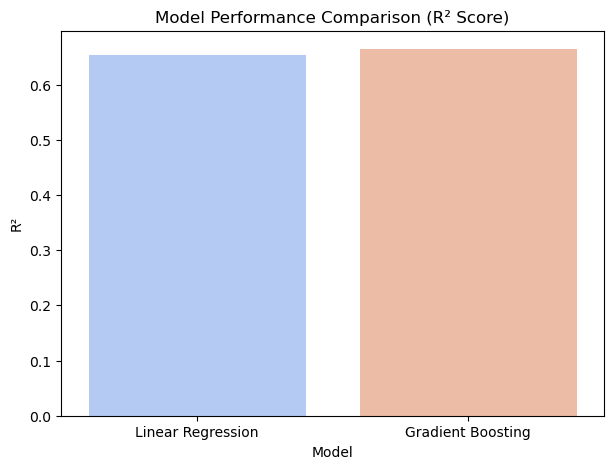

In [18]:

# ====================================================
# 📌 13. Model Comparison
# ====================================================
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'MAE': [lr_results[0], gbr_results[0]],
    'RMSE': [lr_results[1], gbr_results[1]],
    'R²': [lr_results[2], gbr_results[2]]
})

print("\n📌 Model Comparison Table:")
print(comparison_df)

# Plot comparison
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='R²', data=comparison_df, palette='coolwarm')
plt.title("Model Performance Comparison (R² Score)")
plt.show()